<a href="https://colab.research.google.com/github/DionKimmm/2019SummerML/blob/master/Day24_01_%ED%95%99%EC%8A%B5%EA%B4%80%EB%A0%A8%EA%B8%B0%EC%88%A0_Xavier%26He_%EC%B4%88%EA%B9%83%EA%B0%92_%EA%B8%B0%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 초기화 방법에 따른 출력의 분포


# 가중치의 초깃값
* 신경망 학습에서 특히 중요한 것이 가중치의 초깃값입니다. 가중치의 초깃값을 무엇으로 설정하느냐가 신경망 학습의 성패가 갈라지는 일이 많다고 합니다.
* ppt에서 보았듯이, 활성화값은 적당히 고루 분포되어, 층과 층 사이에 적당하게 다양한 데이터가 흐르게 해야 신경망 학습이 효율적으로 이뤄집니다.
* 대표적으로 Xavier 또는 He 초깃값 기법을 이용하면 다양한 값을 표현하여 학습이 효율적으로 이루어집니다.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [0]:
def ReLU(x):
    return np.maximum(0, x)


In [0]:
def tanh(x):
    return np.tanh(x)


In [0]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 10  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장


In [0]:
x = input_data

In [0]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
#     w = np.random.randn(node_num, node_num) * 0.01

# Xavier init
#     w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)

# He init
#     w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

   
    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
#     z = ReLU(a)
    # z = tanh(a)

    activations[i] = z
 

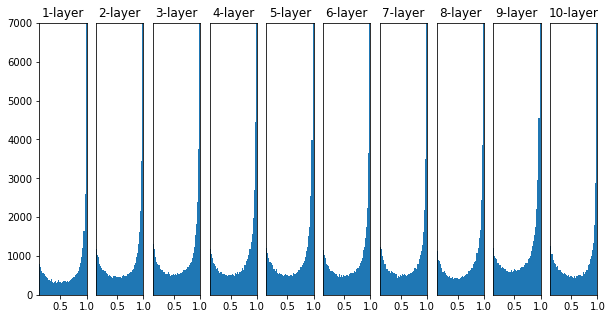

In [8]:
plt.figure(figsize=(10,5))
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 50, range=(0,1))
plt.show()
